In [1]:
import os
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
path_blood = os.path.join('images', 'blood', 'data_red_only.csv')
path_good = os.path.join('images', 'good', 'data_good_red_only.csv')

df_blood = pd.read_csv(path_blood)
df_blood['label'] = 1
# print(df_blood)
df_good = pd.read_csv(path_good)
df_good['label'] = 0
df_data = pd.concat([df_blood, df_good], ignore_index=True)
df_features = df_data.loc[:, df_data.columns != 'label']
# print(df_data)
print(df_features)

    #BE0032  #BC3F4A  #841B2D   #5C0923   #AB4E52   #722F37   #3F1728  \
0       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
1       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.011853   
2       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.001217   
3       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
4       0.0      0.0      0.0  0.000003  0.000000  0.000000  0.000756   
5       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
6       0.0      0.0      0.0  0.000007  0.000000  0.000000  0.000127   
7       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000004   
8       0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000031   
9       0.0      0.0      0.0  0.000055  0.000000  0.000004  0.000735   
10      0.0      0.0      0.0  0.000000  0.000000  0.000000  0.000000   
11      0.0      0.0      0.0  0.000000  0.000000  0.000000  0.065225   
12      0.0      0.0      0.0  0.000000  0.000000  

In [3]:
len(df_data[df_data['label'] == 0])

1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, \
                                                    df_data['label'].values, test_size=0.33, random_state=42)
                                                    
print(X_train)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41242938e-05
  1.41242938e-05 0.00000000e+00 7.32580038e-03 6.91148776e-03
  1.12994350e-03 5.49293785e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.10734463e-04 1.88323917e-04 0.00000000e+00
  3.53625235e-02 1.83615819e-03 3.29566855e-05 2.31308851e-02
  1.41242938e-05 0.00000000e+00 1.69491525e-04 0.00000000e+00
  0.00000000e+00 1.41242938e-05 4.44444444e-03 8.53578154e-03
  1.12810734e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.06308851e-03 8.65065913e-02 8.81920904e-02 6.23258004e-02
  3.08851224e-02 1.83521657e-02 2.90894539e-01 1.12288136e-01
  3.39783427e-02 5.32015066e-03 5.01883239e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.18529040e-02 4.73484848e-05
  1.56912879e-02 4.77588384e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.000

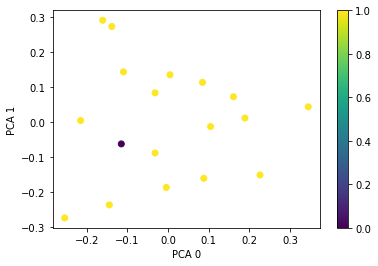

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
plt.scatter(components[:, 0], components[:, 1], c = y_train)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
# plt.legend()
plt.colorbar()
plt.show()
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [7]:
clf = KNeighborsClassifier(n_neighbors=3).fit(pca_train, y_train)
y_hat = clf.predict(pca_test)
clf.score(pca_test, y_test)

1.0

In [8]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
accuracy_score(y_test, y_hat)

0.5555555555555556